___
# PROJETO 2

## Bruno Dratcu
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Bruno Dratcu\Desktop\2o DP\CD\CD1S17\APS\Projeto 2


In [2]:
dados = pd.read_excel('Life.xlsx')
dados.head()

,Life expectancy with projections. Yellow is IHME,A1800,A1801,A1802,A1803,A1804,A1805,A1806,A1807,A1808,...,A2004,A2005,A2006,A2007,A2008,A2009,A2010,A2011,A2012,A2013
0,Afghanistan,28.2110,28.200753,28.190507,28.18026,28.170013,28.159767,28.14952,28.139273,28.129027,...,52.5,52.9,53.2,53.6,54.0,54.5,54.8,55.2,55.5,56.2
1,Albania,35.4000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,...,74.4,74.4,74.5,74.7,74.9,75.0,75.2,75.5,75.7,75.8
2,Algeria,28.8224,28.822400,28.822400,28.82240,28.822400,28.822400,28.82240,28.822400,28.822400,...,74.2,74.5,74.8,75.0,75.3,75.6,75.9,76.1,76.2,76.3
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.0,83.1,83.2,83.4,83.5,83.6,83.7,83.8,83.8,83.9


___
## Seleção dos três anos com diferentes formatos de distribuição da expectativa de vida

In [3]:
dd = pd.DataFrame()

dd["1850"] = sorted(dados["A1850"])
dd["1926"] = sorted(dados["A1926"])
dd["2001"] = sorted(dados["A2001"])

dd.describe()

C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,1850,1926,2001
count,201.000000,201.000000,206.000000
mean,31.635512,36.353496,68.454714
std,4.591929,9.590987,9.227487
min,14.000000,23.387000,45.800000
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,49.530000,63.260000,82.900000


In [4]:
dd = dd.dropna()
dd["1850"] = sorted(dd["1850"])
dd["1926"] = sorted(dd["1926"])
dd["2001"] = sorted(dd["2001"])
dd.describe()

,1850,1926,2001
count,171.000000,171.000000,171.000000
mean,31.040064,34.402025,67.271982
std,4.216762,7.436626,8.911364
min,14.000000,23.387000,45.800000
25%,28.799500,30.100000,60.600000
50%,31.200000,32.200000,70.000000
75%,33.301500,37.607431,74.250000
max,49.530000,59.660000,82.900000


___
### Análise Descritiva

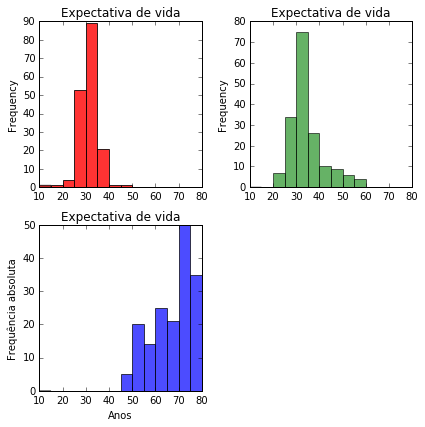

In [5]:
faixa = np.arange(10, 84, 5)

fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
plot = dd["1850"].plot.hist(bins=faixa,title='Expectativa de vida', figsize=(6, 6), color="red", alpha=0.8)

plt.subplot(222)
plot = dd["1926"].plot.hist(bins=faixa,title='Expectativa de vida', figsize=(6, 6), color="green", alpha=0.6)

plt.subplot(223)
plot = dd["2001"].plot.hist(bins=faixa,title='Expectativa de vida', figsize=(6, 6), color="blue", alpha=0.7)
plt.ylabel('Frequência absoluta')
plt.xlabel('Anos')

plt.tight_layout()
plt.show()

Analisando os grafios, temos que no ano de 1850 a expectativa de vida tem, aproximadamente, uma simetria, na qual a media das idades é quase a mesma que a mediana, além dos extremos terem a mesma frequencia. Já em 1926 é possivel notar uma assimetria positiva à direita, isso porque a mediana é menor do que a media das idades, dizendo que a população tem uma expectativa de vida mais baixa, comparado ao ano de 2001, na qual tem assimetria negativa à esquerda, em que a media é menor do que a mediana das idades, idicando uma expectativa de vida maior. Em 1850 a expectativa de vida começa a abaixar em torno dos 35 anos, na qual em 2001 só está aumetando, chegando no seu maximo perto dos 75 anos, em comparação em 1926 a menor expectativa de vida está perto dos 60 anos de idade.

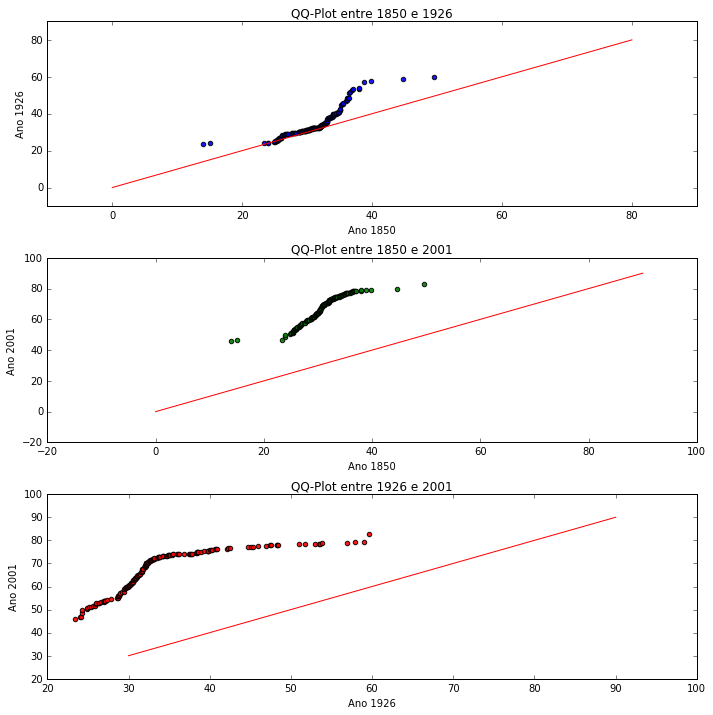

In [6]:
matriz = plt.figure(figsize=(10,10))

plt.subplot(311)
plt.scatter(dd["1850"], dd["1926"], c="blue", alpha=0.9)
plt.title("QQ-Plot entre 1850 e 1926")
plt.xlabel("Ano 1850")
plt.ylabel("Ano 1926")
plt.plot((0,80), (0,80), color="red")


plt.subplot(312)
plt.scatter(dd["1850"], dd["2001"], c="green", alpha=0.9)
plt.title("QQ-Plot entre 1850 e 2001")
plt.xlabel("Ano 1850")
plt.ylabel("Ano 2001")
plt.plot((0,90),(0,90), color="red")


plt.subplot(313)
plt.scatter(dd["1926"], dd["2001"], c="red", alpha=0.9)
plt.title("QQ-Plot entre 1926 e 2001")
plt.xlabel("Ano 1926")
plt.ylabel("Ano 2001")
plt.plot((30,90), (30,90), color="red")

plt.tight_layout()
plt.show()

O primeiro grafico mostra uma grande concentração na expectativa de vida entre aproximadamente 25 a 35 anos que são iguais nos anos de 1850 e 1926. Já para idades superiores a 35, a concentração é maior em 1926.

O segundo grafico indica uma grande concentração da maioria da população, com expectativa de vida entre 20 a 40 anos em 1850, na qual é maior em 2001, entre as idades de 40 a 80 anos. 

O terceiro grafico indica que a expectativa de vida é maior no ano de 2001 em relação a 1926, com uma grande concentração nas idades de 50 a 75 anos em 2001, e idades superiores a essa com uma baixa concentração até os 82 anos, em comparação à uma grande concentração de uma população de 25 a 40 anos e uma baixa concentração (a minoria) superiores a 40, não ultrapassando os 60 anos

### Aderência de um modelo probabilístico normal aos dados

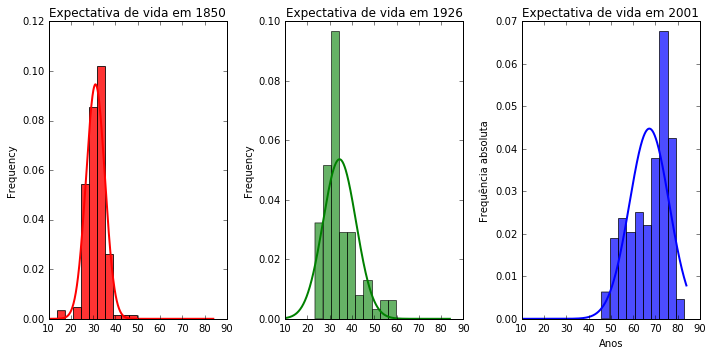

In [7]:
fig = plt.figure(figsize=(10,5)) 
faixa2 = np.arange(10, 84, 0.1)

lista1 = []
lista2 = []
lista3 = []

media1 = dd["1850"].mean()
dp1 = dd["1850"].std()

media2 = dd["1926"].mean()
dp2 = dd["1926"].std()

media3 = dd["2001"].mean()
dp3 = dd["2001"].std()

for i in faixa2:
    lista1.append(stats.norm.pdf(i, media1, dp1))
    lista2.append(stats.norm.pdf(i, media2, dp2))
    lista3.append(stats.norm.pdf(i, media3, dp3))
    
   

plt.subplot(131)    
plot = dd["1850"].plot.hist(title='Expectativa de vida em 1850', color="red", alpha=0.8, normed=1)
plt.plot(faixa2, lista1, lw=2, color="red")

plt.subplot(132)
plot = dd["1926"].plot.hist(title='Expectativa de vida em 1926', color="green", alpha=0.6, normed=1)
plt.plot(faixa2, lista2, lw=2, color="green")

plt.subplot(133)
plot = dd["2001"].plot.hist(title='Expectativa de vida em 2001', color="blue", alpha=0.7, normed=1)
plt.plot(faixa2, lista3, lw=2, color="blue")

plt.ylabel('Frequência absoluta')
plt.xlabel('Anos')


plt.tight_layout()
plt.show()

In [8]:
n1 = len(dd["1850"])

In [9]:
freq_acum = []
for i in range(n1):
    freq_acum.append((i-0.5)/n1)

    
fda1 = stats.norm.cdf(dd["1850"], media1, dp1)
fda2 = stats.norm.cdf(dd["1926"], media2, dp2)
fda3 = stats.norm.cdf(dd["2001"], media3, dp3)

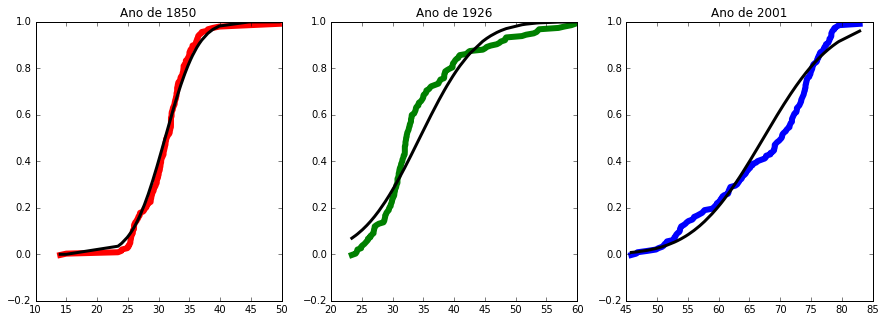

In [10]:
matriz = plt.figure(figsize=(15,5)) 

plt.subplot(131)
plt.title("Ano de 1850")
plt.plot(dd["1850"], freq_acum, lw=6, color="red")
plt.plot(dd["1850"], fda1, lw=3, color="black")

plt.subplot(132)
plt.title("Ano de 1926")
plt.plot(dd["1926"], freq_acum, lw=6, color="green")
plt.plot(dd["1926"], fda2, lw=3, color="black")

plt.subplot(133)
plt.title("Ano de 2001")
plt.plot(dd["2001"], freq_acum, lw=6, color="blue")
plt.plot(dd["2001"], fda3, lw=3, color="black")
plt.show()

O primeiro grafico indica uma simetria entre a area acumulada normal em relação a area acumulada dos dados, com uma leve assimetria negativa entre as idades de 25 a 35 anos.

O segundo grafico indica uma forte assimetria positiva nas idades de 33 a 43 anos, sendo assim a maioria da população com idades inferiores a 45 anos, com uma leve assimetria positiva para idades superiores a 45 anos.

O terceiro grafico indica uma leve assimetrica entre as idades de 55 a 60 anos, além de idades superiores a 75. Em compensação, uma forte assimetria negativa entre as idades de 63 a 75 anos, indicando a maioria da população esta entre tais idades.

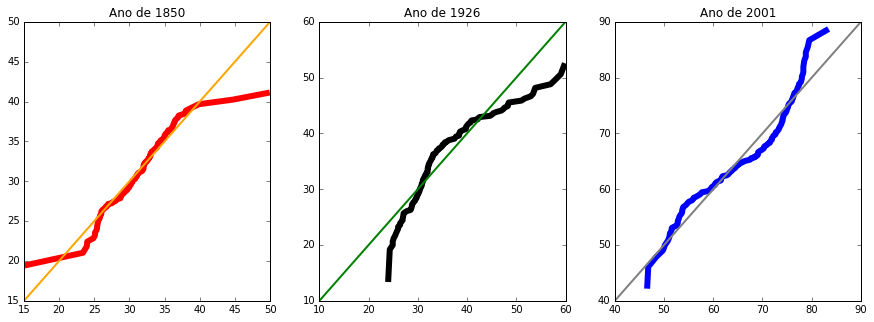

In [20]:
qua1 = []
qua2 = []
qua3 = []

for i in freq_acum:
    qua1.append(stats.norm.ppf(i, media1, dp1))
    qua2.append(stats.norm.ppf(i, media2, dp2))
    qua3.append(stats.norm.ppf(i, media3, dp3))
    
matriz = plt.figure(figsize=(15,5)) 
    
plt.subplot(131)
plt.plot(dd["1850"], qua1, lw=6, color="red")
plt.title("Ano de 1850")
plt.plot((15,50),(15,50), lw=2,color="orange")

plt.subplot(132)
plt.plot(dd["1926"], qua2, lw=6, color="black")
plt.title("Ano de 1926")
plt.plot((10,60),(10,60), lw=2, color="green")

plt.subplot(133)
plt.plot(dd["2001"], qua3, lw=6, color="blue")
plt.title("Ano de 2001")
plt.plot((40,90),(40,90), lw=2, color="grey")
plt.show()

O grafico do ano de 1850 mostra que entre as idades de 27 a 37 anos coincide com a o modelo da normal, com uma leve assimetria negativa entre as idades de 20 a 25 anos.

O grafico do ano de 1926 indica uma forte assimetria negativa entre as idades de 22 a 30 anos e idades superiores a 40 anos, além de mostrar uma leve assimetria positiva em relação ao modelo teorico entre as idades de 30 a 40 anos.

O grafico do ano de 2001 mostra leves oscilações de assimetrias, com: assimetria negatva de idades inferiores a 50 anos e tambem de idades entre 60 e 75 anos. Além de assimetria positiva em relação ao modelo teorico entre as idades de 50 e 60 anos e tambem de idades superiores a 75 anos.

___
### Aderência de um modelo probabilístico assimétrico aos dados

In [12]:
a1 = []
b1 = []
c1 = []

a1,b1,c1 = stats.gamma.fit(dd["1850"])

In [13]:
a2 = []
b2 = []
c2 = []

a2,b2,c2 = stats.lognorm.fit(dd["1926"])

In [14]:
a3 = []
b3 = []
c3 = []
d3 = []

a3,b3,c3,d3 = stats.beta.fit(dd["2001"])

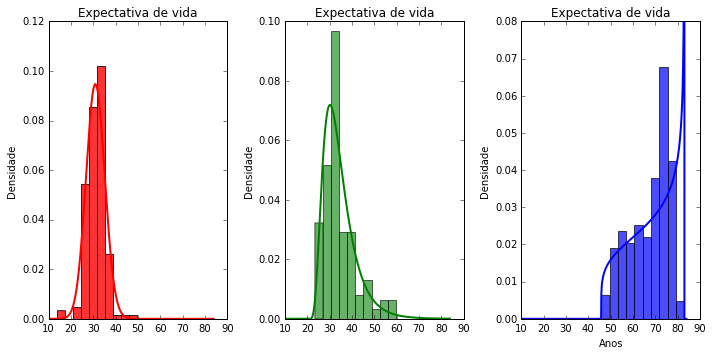

In [15]:
fig = plt.figure(figsize=(10,5)) 
faixa2 = np.arange(10, 84, 0.1)

lista1 = []
lista2 = []
lista3 = []

media1 = dd["1850"].mean()
dp1 = dd["1850"].std()

media2 = dd["1926"].mean()
dp2 = dd["1926"].std()

media3 = dd["2001"].mean()
dp3 = dd["2001"].std()

for i in faixa2:
    lista1.append(stats.gamma.pdf(i, a1, loc=b1, scale=c1))
    lista2.append(stats.lognorm.pdf(i, a2, loc=b2, scale=c2))
    lista3.append(stats.beta.pdf(i, a3, b3, loc=c3, scale=d3))
    
   

plt.subplot(131)    
plot = dd["1850"].plot.hist(title='Expectativa de vida', color="red", alpha=0.8, normed=1)
plt.plot(faixa2, lista1, lw=2, color="red")
plt.ylabel('Densidade')

plt.subplot(132)
plot = dd["1926"].plot.hist(title='Expectativa de vida', color="green", alpha=0.6, normed=1)
plt.plot(faixa2, lista2, lw=2, color="green")
plt.ylabel('Densidade')

plt.subplot(133)
plot = dd["2001"].plot.hist(title='Expectativa de vida', color="blue", alpha=0.7, normed=1)
plt.plot(faixa2, lista3, lw=2, color="blue")
plt.ylim(0,0.08)

plt.ylabel('Densidade')
plt.xlabel('Anos')


plt.tight_layout()
plt.show()

___
### Cálculo de probabilidades a partir da distribuição normal

### 1)

In [16]:
#fda > 70 anos
# 1 - p(X<=70)

u = 70
z1 = (u - media1)/dp1
p1 = stats.norm.cdf(z1)
prob1 = 1-p1

z2 = (u - media2)/dp2
p2 = stats.norm.cdf(z2)
prob2 = 1-p2

z3 = (u - media3)/dp3
p3 = stats.norm.cdf(z3)
prob3 = 1-p3

print("Probabilidade do país ter uma expectativa de vida superior a 70 anos em 1850 é de: ", (prob1*100))
print("Probabilidade do país ter uma expectativa de vida superior a 70 anos em 1926 é de: ", (prob2*100))
print("Probabilidade do país ter uma expectativa de vida superior a 70 anos em 2001 é de: ", (prob3*100))

Probabilidade do país ter uma expectativa de vida superior a 70 anos em 1850 é de:  0.0
Probabilidade do país ter uma expectativa de vida superior a 70 anos em 1926 é de:  8.47117691216e-05
Probabilidade do país ter uma expectativa de vida superior a 70 anos em 2001 é de:  37.9753613819


### 2)

In [17]:
# fda entre 70 e 75
# p(X<=75) - p(X<=70)

u70 = 70
u75 = 75

z1 = (u75 - media1)/dp1
p1 = stats.norm.cdf(z1)
z11 = (u70 - media1)/dp1
p11 = stats.norm.cdf(z11)

result1 = (p1 - p11)/(1-p11)

print("Probabilidade da expectativa de vida ser inferior a 75 anos em 1850 é: ", (result1*100))


z2 = (u75 - media2)/dp2
p2 = stats.norm.cdf(z2)
z22 = (u70 - media2)/dp2
p22 = stats.norm.cdf(z22)

result2 = (p2 - p22)/(1-p22)

print("Probabilidade da expectativa de vida ser inferior a 75 anos em 1850 é: ", (result2*100))


z3 = (u75 - media3)/dp3
p3 = stats.norm.cdf(z3)
z32 = (u70 - media3)/dp3
p32 = stats.norm.cdf(z32)

result3 = (p3 - p32)/(1-p32)

print("Probabilidade da expectativa de vida ser inferior a 75 anos em 1850 é: ", (result3*100))

Probabilidade da expectativa de vida ser inferior a 75 anos em 1850 é:  nan
Probabilidade da expectativa de vida ser inferior a 75 anos em 1850 é:  97.176876028
Probabilidade da expectativa de vida ser inferior a 75 anos em 1850 é:  49.2003064016


### 3)

In [18]:
a1850 = stats.norm.ppf(0.10, media1, dp1)

a1926 = stats.norm.ppf(0.10, media2, dp2)

a2001 = stats.norm.ppf(0.10, media3, dp3)

print("A maior expectativa de vida em 1850 é: ", a1850)
print("A maior expectativa de vida em 1926 é: ", a1926)
print("A maior expectativa de vida em 2001 é: ", a2001)

A maior expectativa de vida em 1850 é:  25.6360661177
A maior expectativa de vida em 1926 é:  24.8716051715
A maior expectativa de vida em 2001 é:  55.8516101852


### 4)

In [19]:
a1850 = stats.norm.ppf(0.90, media1, dp1)

a1926 = stats.norm.ppf(0.90, media2, dp2)

a2001 = stats.norm.ppf(0.90, media3, dp3)

print("A menor expectativa de vida em 1850 é: ", a1850)
print("A menor expectativa de vida em 1926 é: ", a1926)
print("A menor expectativa de vida em 2001 é: ", a2001)

A menor expectativa de vida em 1850 é:  36.4440621029
A menor expectativa de vida em 1926 é:  43.9324440477
A menor expectativa de vida em 2001 é:  78.6923547271
